In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from matplotlib import style
#from visidata.cliptext import clipbox

warnings.simplefilter(action='ignore', category='FutureWarning')


In [67]:
# THEMING

# Set modern white theme
sns.set_theme(
    style="white",           # Clean white background
    context="notebook",      # Good for jupyter notebooks
    palette="deep",          # Modern color palette
    font="sans-serif",       # Clean, modern font
    font_scale=1.1,         # Slightly larger text for readability
    color_codes=True
)

# Remove top and right spines for cleaner look
sns.set_style("white")


In [68]:
bbl = pd.read_csv('bbl.csv')
bpl = pd.read_csv('bpl.csv')
hundred = pd.read_csv('hundred.csv')
ilt = pd.read_csv('ilt.csv')
mlc = pd.read_csv('mlc.csv')
psl = pd.read_csv('psl.csv')
sa20 = pd.read_csv('sa20.csv')
ipl = pd.read_csv('ipl.csv')

In [69]:
ipl.head()

,squad,player_name,role
0,Chennai Super Kings,Andre Siddarth,BAT
1,Chennai Super Kings,Ayush Mhatre,BAT
2,Chennai Super Kings,Devon Conway,BAT
3,Chennai Super Kings,Rahul Tripathi,BAT
4,Chennai Super Kings,Shaik Rasheed,BAT


In [70]:
hundred.head()

,Squad,Player Name,Role
0,Birmingham Phoenix,Aneurin Donald,BAT
1,Birmingham Phoenix,Jacob Bethell,BAT
2,Birmingham Phoenix,Will Smeed,BAT
3,Birmingham Phoenix,Benny Howell,ALL-R
4,Birmingham Phoenix,Dan Mousley,ALL-R


In [71]:
hundred.rename(columns={'Squad':'squad', 'Player Name':'player_name','Role':'role'},inplace=True)

In [72]:
hundred.head()

,squad,player_name,role
0,Birmingham Phoenix,Aneurin Donald,BAT
1,Birmingham Phoenix,Jacob Bethell,BAT
2,Birmingham Phoenix,Will Smeed,BAT
3,Birmingham Phoenix,Benny Howell,ALL-R
4,Birmingham Phoenix,Dan Mousley,ALL-R


In [73]:
bbl['league'] = 'BBL'
bpl['league'] = 'BPL'
sa20['league'] = 'SA20'
psl['league'] = 'PSL'
mlc['league'] = 'MLC'
ilt['league'] = 'ILT20'
ipl['league'] = 'IPL'
hundred['league'] = 'The Hundred'

In [74]:
#UNION

frames = [bbl,bpl,hundred,ilt,mlc,psl,sa20,ipl]
all = pd.concat(frames)
all.tail()

,squad,player_name,role,league
222,Gujarat Titans,Kulwant Khejroliya,BOWL,IPL
223,Gujarat Titans,Manav Suthar,BOWL,IPL
224,Gujarat Titans,Mohammed Siraj,BOWL,IPL
225,Gujarat Titans,Prasidh Krishna,BOWL,IPL
226,Gujarat Titans,Sai Kishore,BOWL,IPL


In [75]:
temp_df = all.groupby('player_name').size().reset_index(name='count').sort_values('count',ascending=False)
temp_df

,player_name,count
180,David Warner,5
488,Mitchell Owen,5
20,Adam Milne,5
779,Tim Seifert,5
444,Marcus Stoinis,5
...,...,...
330,John Turner,1
332,Jon-Russ Jaggesar,1
333,Jonathan Merlo,1
334,Jonathan Wells,1


In [76]:
temp_df = temp_df[temp_df['count'] > 3].copy()
temp_df['nation'] = ['AUS',  # David Warner
 'AUS',  # Mitchell Owen
 'NZL',  # Adam Milne
 'NZL',  # Tim Seifert
 'AUS',  # Marcus Stoinis
 'ENG',  # James Vince
 'NZL',  # Finn Allen
 'ENG',  # Chris Jordan
 'ZAF',  # Heinrich Klaasen
 'ENG',  # Alex Hales
 'ENG',  # Sam Billings
 'WIS',  # Andre Russell
 'ZAF',  # George Linde
 'AUS',  # Ashton Turner
 'NZL',  # Trent Boult
 'ZAF',  # Faf du Plessis
 'AFG',  # Rashid Khan
 'WIS',  # Shimron Hetmyer
 'ZAF',  # Donovan Ferreira
 'ENG',  # Tom Curran
 'AUS',  # Tim David
 'WIS',  # Kyle Mayers
 'WIS',  # Akeal Hosein
 'AFG',  # Noor Ahmad
 'WIS',  # Jason Holder
 'ENG'   # Moeen Ali
]

temp_df

,player_name,count,nation
180,David Warner,5,AUS
488,Mitchell Owen,5,AUS
20,Adam Milne,5,NZL
779,Tim Seifert,5,NZL
444,Marcus Stoinis,5,AUS
309,James Vince,5,ENG
223,Finn Allen,4,NZL
148,Chris Jordan,4,ENG
267,Heinrich Klaasen,4,ZAF
44,Alex Hales,4,ENG


In [77]:
def generate_hex_colors(quantity):
    """Generate random hex color codes"""
    colors = []
    for _ in range(quantity):
        # Generate random RGB values (0-255) and convert to hex
        color = "#{:02x}{:02x}{:02x}".format(
            random.randint(0, 255),
            random.randint(0, 255),
            random.randint(0, 255)
        )
        colors.append(color)
    return colors

In [78]:
custom_palette = {
    'AUS': 'yellow',
    'WIS': 'red',
    'IND': 'orange',
    'ENG': 'lightblue',
    'PAK': 'green',
    'ZAF': 'orange',
    'NZL': 'black',
    'AFG': 'blue'
}

<Axes: xlabel='No. of leagues', ylabel='player_name'>

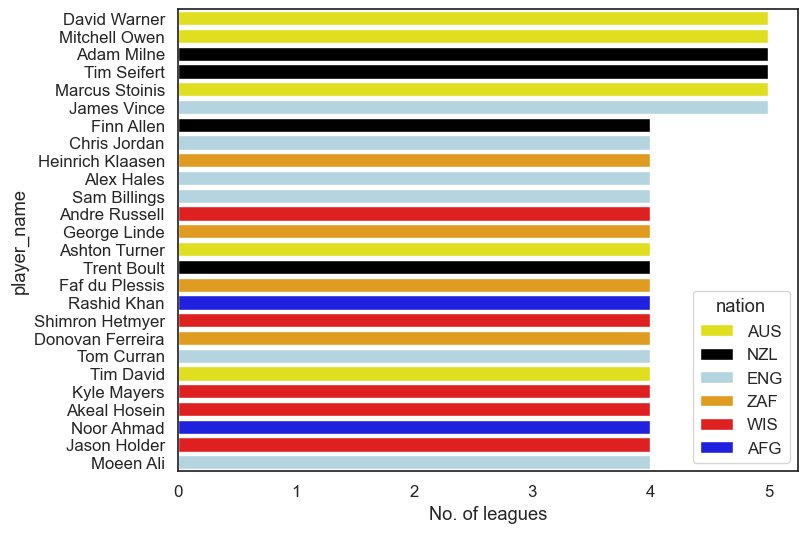

In [79]:
#plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(8,6))
#plt.tight_layout()
plt.xlabel('No. of leagues')
sns.barplot(temp_df,y='player_name',x='count',hue='nation', palette=custom_palette)


In [80]:
league_palette = {
    'IPL': 'blue',
    'BBL': 'yellow',
    'PSL': '#43A047',
    'The Hundred': 'lightblue',
    'MLC': 'crimson',
    'SA20': 'pink',
    'BPL': 'limegreen',
    'ILT20': '#009688'

}

In [81]:
# Calculate number of leagues each player participates in
player_leagues = all.groupby('player_name')['league'].nunique().reset_index(name='league_count')
player_leagues
#same as temp_df

,player_name,league_count
0,AM Ghazanfar,2
1,Aamer Jamal,2
2,Aaron Hardie,2
3,Aaron Jones,2
4,Aayan Khan,1
...,...,...
860,Zeeshan Ansari,1
861,Zeeshan Naseer,1
862,Zia-ul-Haq,1
863,Ziaur Rahman,1


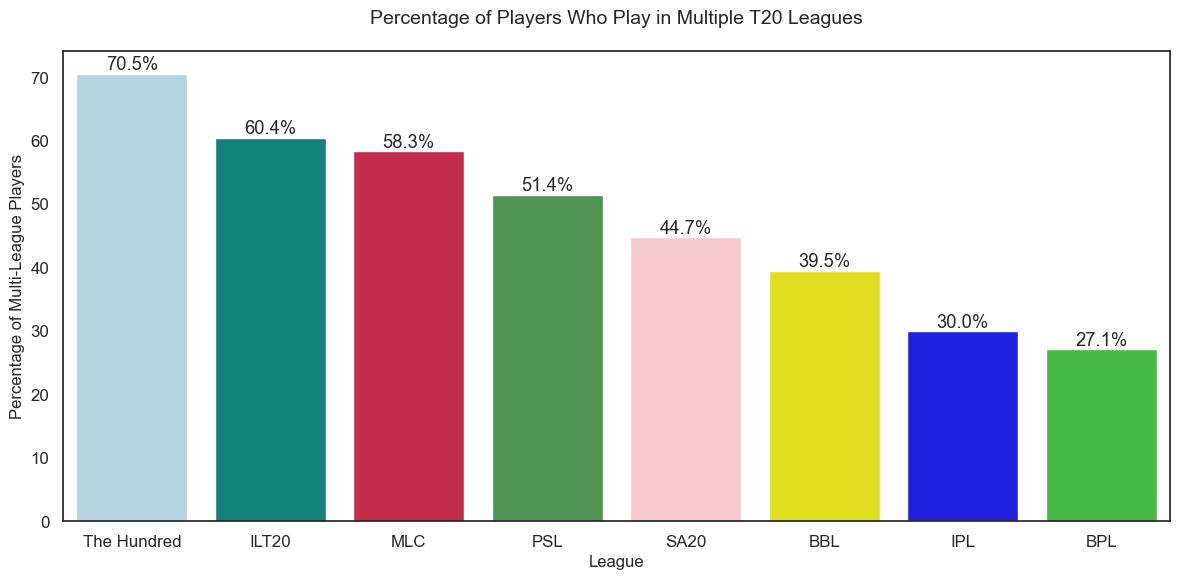


Detailed Statistics:
     league  percentage  total_players  multi_league_players
The Hundred   70.535714            112                    79
      ILT20   60.447761            134                    81
        MLC   58.333333            120                    70
        PSL   51.449275            138                    71
       SA20   44.736842            114                    51
        BBL   39.473684            152                    60
        IPL   29.955947            227                    68
        BPL   27.071823            181                    49


In [82]:

# Calculate for each league the percentage of its players who play in multiple leagues
league_stats = []
for league in all['league'].unique():
    # Get players in this league
    league_players = all[all['league'] == league]['player_name'].unique()

    # Get count of these players who play in multiple leagues
    multi_league_players = player_leagues[
        (player_leagues['player_name'].isin(league_players)) &
        (player_leagues['league_count'] > 1)
        ].shape[0]

    # Calculate percentage
    percentage = (multi_league_players / len(league_players)) * 100

    league_stats.append({
        'league': league,
        'percentage': percentage,
        'total_players': len(league_players),
        'multi_league_players': multi_league_players
    })

# Convert to DataFrame
league_stats_df = pd.DataFrame(league_stats)

# Create the visualization
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    data=league_stats_df.sort_values('percentage', ascending=False),
    x='league',
    y='percentage',
    hue='league',
    palette=league_palette
)

# Customize the plot
plt.title('Percentage of Players Who Play in Multiple T20 Leagues', pad=20, fontsize=14)
plt.xlabel('League', fontsize=12)
plt.ylabel('Percentage of Multi-League Players', fontsize=12)
#plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, bar in enumerate(bars.patches):
    percentage = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2.,
        percentage,
        f'{percentage:.1f}%',
        ha='center',
        va='bottom'
    )

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(league_stats_df.sort_values('percentage', ascending=False).to_string(index=False))


No of Multi-league players by Teams

In [83]:
temp_df2 = all.groupby('squad')['player_name'].nunique().reset_index(name='count')
temp_df2

,squad,count
0,Abu Dhabi Knight Riders,18
1,Adelaide Strikers,19
2,Birmingham Phoenix,14
3,Brisbane Heat,21
4,Chennai Super Kings,25
5,Chittagong Kings,28
6,Delhi Capitals,22
7,Desert Vipers,20
8,Dhaka Capitals,29
9,Dubai Capitals,28


In [84]:
# #q = all.groupby('player_name')['league'].nunique().reset_index(name='league_count')
# q = all.groupby('player_name').size().reset_index(name='count')
# q

In [85]:
# teamwise = []
# for l in all['squad'].unique():
#
#     x = []
#
#     squad_players = all[all['squad'] == l]['player_name'].unique()
#     for i in squad_players :
#
#         x.append(q[
#             (q['count'] > 3)
#         ])
#
#     teamwise.append({
#         'squad': l,
#         'players': len(x)
#
#
#     })


In [86]:
# Calculate number of leagues each player participates in
# player_leagues = all.groupby('player_name')['league'].nunique().reset_index(name='league_count')
# player_leagues

In [87]:
# Merge squad info with player league counts and group by squad
#### VERY IMPORTANT BELOW ### LEARN SUCH TECHNIQUE

teamwise_df = all[['player_name', 'squad']].drop_duplicates().merge(
    player_leagues, on='player_name', how='left'
).query('league_count > 1').groupby('squad').size().reset_index(name='players').sort_values('players', ascending=False)

# Convert to list of dictionaries
#teamwise = teamwise_df.to_dict('records')
teamwise = pd.DataFrame(teamwise_df)


In [88]:
teamwise

,squad,players
46,Sharjah Warriorz,16
26,MI Emirates,16
16,Islamabad United,15
7,Desert Vipers,14
45,Seattle Orcas,13
14,Gulf Giants,13
22,London Spirit,12
37,Peshawar Zalmi,12
31,Multan Sultans,12
25,MI Cape Town,12


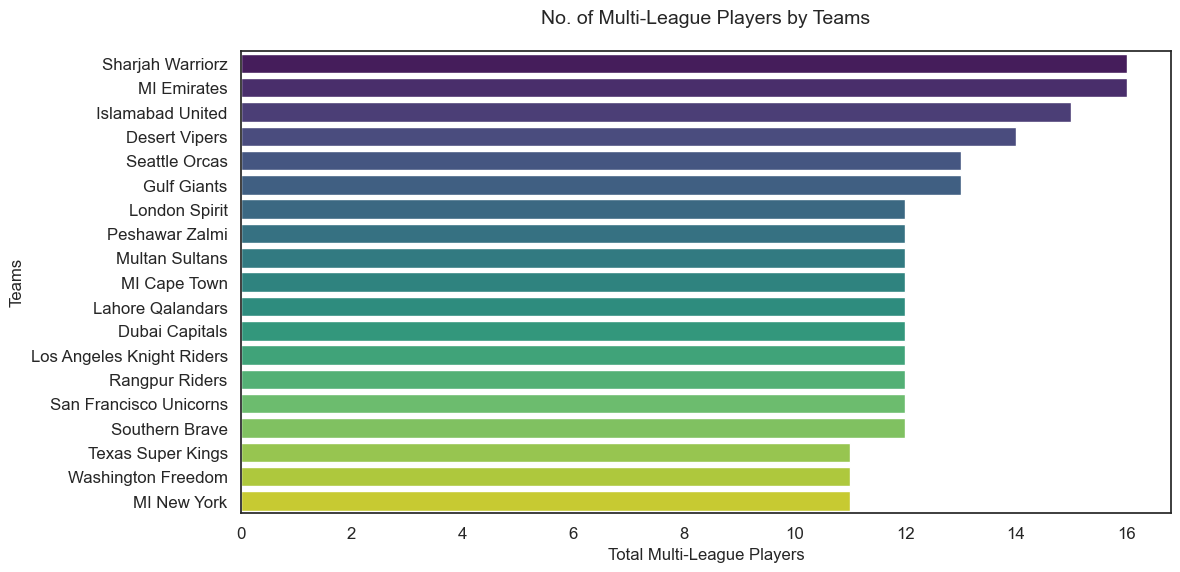


Detailed Statistics:
                      squad  players
           Sharjah Warriorz       16
                MI Emirates       16
           Islamabad United       15
              Desert Vipers       14
              Seattle Orcas       13
                Gulf Giants       13
             Dubai Capitals       12
     San Francisco Unicorns       12
             Rangpur Riders       12
  Los Angeles Knight Riders       12
             Southern Brave       12
           Lahore Qalandars       12
             Multan Sultans       12
             Peshawar Zalmi       12
              London Spirit       12
               MI Cape Town       12
          Texas Super Kings       11
         Washington Freedom       11
                MI New York       11
                 Welsh Fire       10
      Durban's Super Giants       10
              Karachi Kings       10
           Oval Invincibles       10
          Quetta Gladiators       10
            Perth Scorchers       10
    Abu Dhabi Kn

In [89]:
plt.figure(figsize=(12, 6))
plt.title('No. of Multi-League Players by Teams', pad=20, fontsize=14)
plt.xlabel('Total Multi-League Players', fontsize=12)
plt.ylabel('Teams', fontsize=12)
sns.barplot(teamwise.head(19), y='squad', x='players', hue='squad', palette='viridis')
plt.show()
print("\nDetailed Statistics:")
print(teamwise.sort_values('players', ascending=False).to_string(index=False))

In [90]:
## Worst affected IPL teams ##

new_df = all[['player_name','league','squad']].query('league=="IPL"').merge(
    player_leagues, on='player_name', how='left').query('league_count > 1').groupby('squad').size().reset_index(name='dhokebaaz').sort_values('dhokebaaz', ascending=False)


In [91]:
new_df

,squad,dhokebaaz
2,Gujarat Titans,9
0,Chennai Super Kings,8
7,Rajasthan Royals,8
3,Kolkata Knight Riders,7
5,Mumbai Indians,7
6,Punjab Kings,7
8,Royal Challengers Bengaluru,7
1,Delhi Capitals,6
4,Lucknow Super Giants,6
9,Sunrisers Hyderabad,3


<Axes: title={'center': 'Worst affected IPL teams'}, xlabel='Total Multi-League Players', ylabel='Teams'>

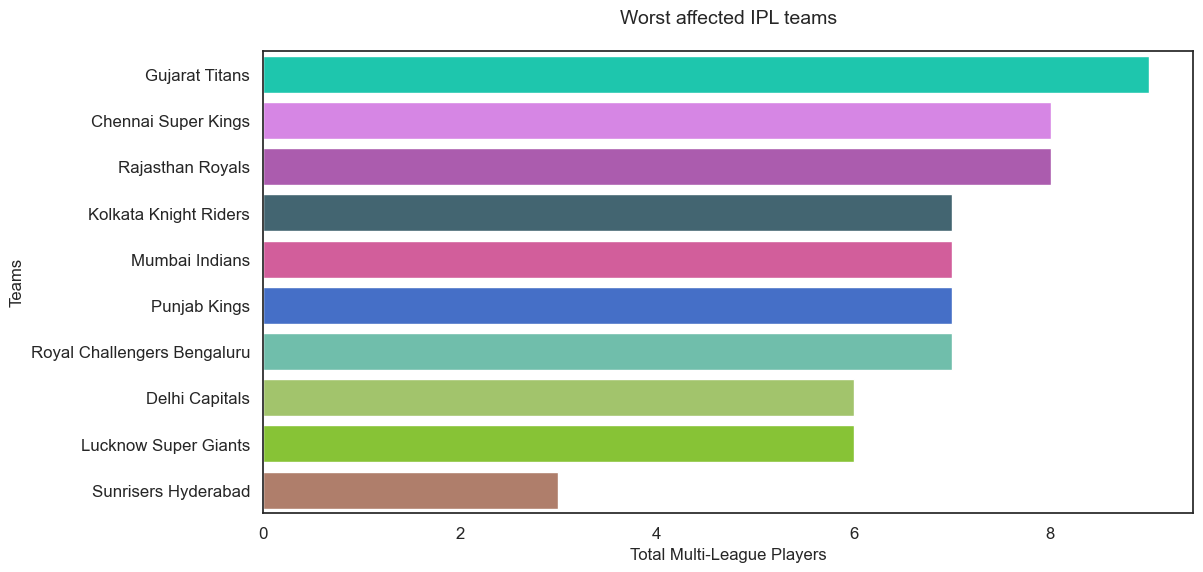

In [92]:
plt.figure(figsize=(12, 6))
plt.title('Worst affected IPL teams', pad=20, fontsize=14)
plt.xlabel('Total Multi-League Players', fontsize=12)
plt.ylabel('Teams', fontsize=12)
sns.barplot(new_df,y='squad',x='dhokebaaz', hue='squad', palette=generate_hex_colors(len(new_df)))

Multi-League Players

In [93]:
new_df2 = player_leagues.groupby('league_count').size().reset_index(name='total_players')
new_df2

,league_count,total_players
0,1,649
1,2,151
2,3,39
3,4,20
4,5,6


([<matplotlib.patches.Wedge at 0x2238f321f90>,
 [Text(-0.7771110140918671, -0.7785232634784333, '1'),
  Text(0.9376432226127004, 0.5751740493872007, '2'),
  Text(0.35696987015872705, 1.0404674486973928, '3'),
  Text(0.12755506886329596, 1.092579381284161, '4'),
  Text(0.02396885978555447, 1.099738829795775, '5')])

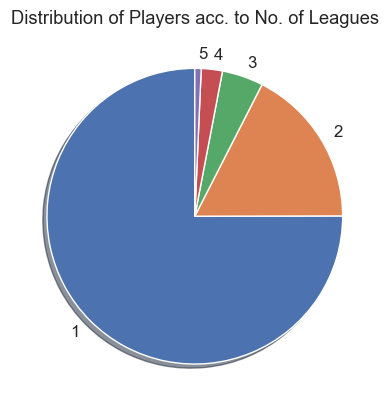

In [94]:
plt.title("Distribution of Players acc. to No. of Leagues")
plt.pie(new_df2['total_players'], labels=new_df2['league_count'],  shadow=True, startangle=90)

In [95]:
new_df3 = player_leagues.groupby('league_count').size().reset_index(name='total_players').query('league_count>1')
new_df3

,league_count,total_players
1,2,151
2,3,39
3,4,20
4,5,6


([<matplotlib.patches.Wedge at 0x2238ead25d0>,
 [Text(-0.8917956768981089, -0.6439724145224265, '2'),
  Text(1.0665466774927033, 0.2692177273681578, '3'),
  Text(0.49367883100995114, 0.9829960385538938, '4'),
  Text(0.09587092778260249, 1.0958142019549222, '5')],
 [Text(-0.48643400558078664, -0.3512576806485962, '69.9%'),
  Text(0.5817527331778382, 0.14684603310990424, '18.1%'),
  Text(0.26927936236906425, 0.536179657393033, '9.3%'),
  Text(0.052293233335964986, 0.5977168374299575, '2.8%')])

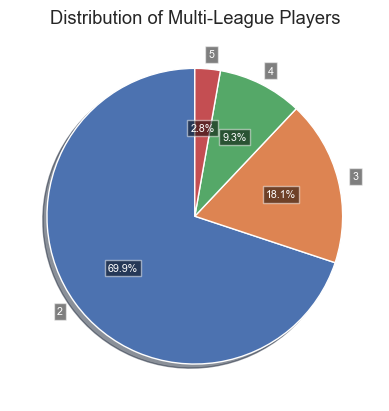

In [96]:
plt.title("Distribution of Multi-League Players")
plt.pie(new_df3['total_players'], labels=new_df3['league_count'],  shadow=True, startangle=90, autopct='%1.1f%%', textprops=dict(color="white",bbox=dict(facecolor='black', alpha=0.5),fontsize='xx-small'))

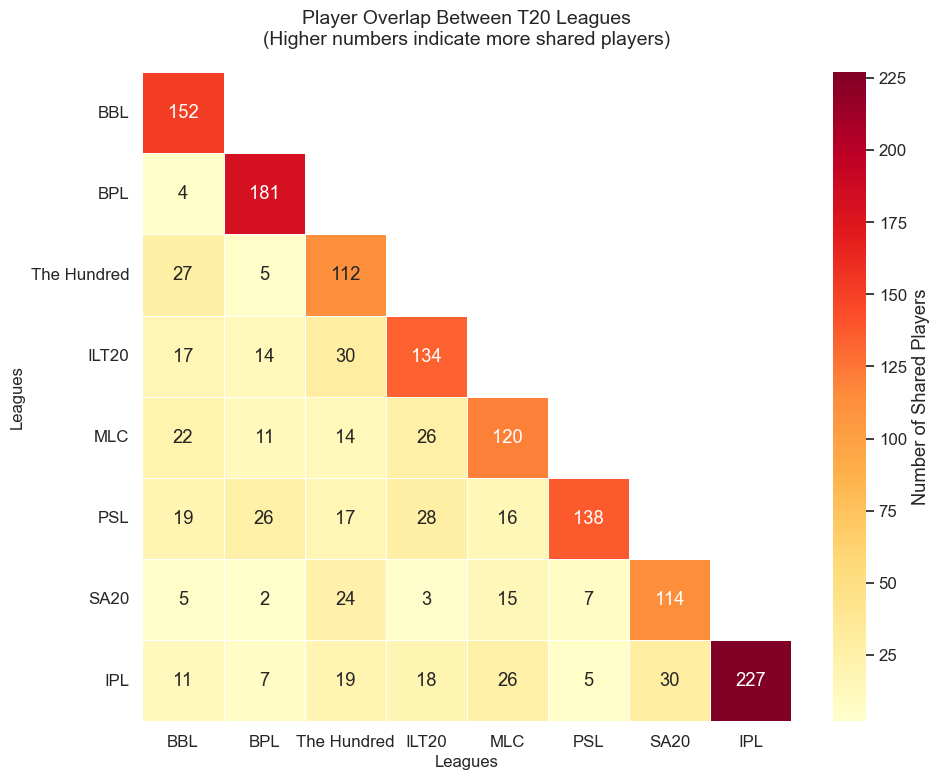

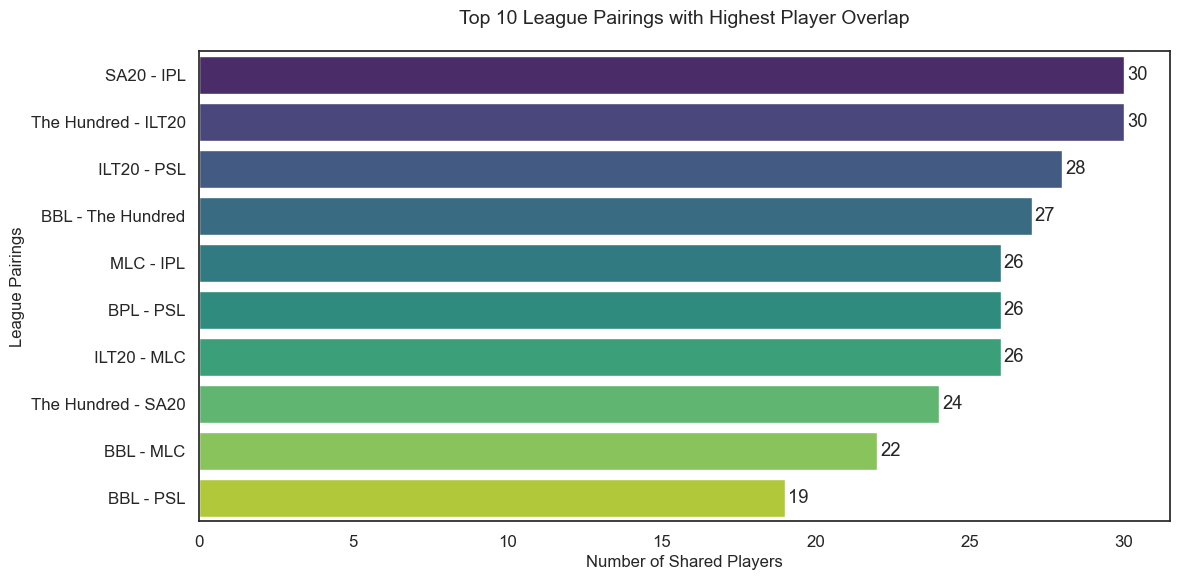


Top League Pairings by Player Overlap:
        League_Pair  Shared_Players
         SA20 - IPL              30
The Hundred - ILT20              30
        ILT20 - PSL              28
  BBL - The Hundred              27
          MLC - IPL              26
          BPL - PSL              26
        ILT20 - MLC              26
 The Hundred - SA20              24
          BBL - MLC              22
          BBL - PSL              19


In [97]:

# Create a matrix showing player overlap between leagues
from itertools import combinations
import numpy as np

# Get all unique leagues
leagues = all['league'].unique()

# Create a matrix to store overlap counts
overlap_matrix = pd.DataFrame(index=leagues, columns=leagues, dtype=int)

# Fill the matrix with overlap counts
for league1 in leagues:
    for league2 in leagues:
        if league1 == league2:
            # Same league - use total unique players
            overlap_matrix.loc[league1, league2] = len(all[all['league'] == league1]['player_name'].unique())
        else:
            # Different leagues - count shared players
            players1 = set(all[all['league'] == league1]['player_name'].unique())
            players2 = set(all[all['league'] == league2]['player_name'].unique())
            overlap_matrix.loc[league1, league2] = len(players1.intersection(players2))

# Convert to numeric for plotting
overlap_matrix = overlap_matrix.astype(int)

# Create the heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(overlap_matrix, dtype=bool), k=1)  # Mask upper triangle to avoid duplication

# Create heatmap
sns.heatmap(overlap_matrix, 
            mask=mask,
            annot=True, 
            fmt='d',
            cmap='YlOrRd',
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Number of Shared Players'})

plt.title('Player Overlap Between T20 Leagues\n(Higher numbers indicate more shared players)', 
          fontsize=14, pad=20)
plt.xlabel('Leagues', fontsize=12)
plt.ylabel('Leagues', fontsize=12)
#plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Also create a bar chart showing the top league pairings
league_pairs = []
for i, league1 in enumerate(leagues):
    for j, league2 in enumerate(leagues):
        if i < j:  # Avoid duplicates
            overlap_count = overlap_matrix.loc[league1, league2]
            league_pairs.append({
                'League_Pair': f"{league1} - {league2}",
                'Shared_Players': overlap_count
            })

pairs_df = pd.DataFrame(league_pairs).sort_values('Shared_Players', ascending=False)

# Plot top 10 league pairings
plt.figure(figsize=(12, 6))
top_pairs = pairs_df.head(10)
sns.barplot(data=top_pairs, 
            x='Shared_Players', 
            y='League_Pair',
            hue='League_Pair',
            palette='viridis')

plt.title('Top 10 League Pairings with Highest Player Overlap', fontsize=14, pad=20)
plt.xlabel('Number of Shared Players', fontsize=12)
plt.ylabel('League Pairings', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(plt.gca().patches):
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nTop League Pairings by Player Overlap:")
print(pairs_df.head(10).to_string(index=False))

In [98]:
all.head(10)

,squad,player_name,role,league
0,Melbourne Renegades,Jacob Bethell,BAT,BBL
1,Melbourne Renegades,Jake Fraser-McGurk,BAT,BBL
2,Melbourne Renegades,Jonathan Wells,BAT,BBL
3,Melbourne Renegades,Josh Brown,BAT,BBL
4,Melbourne Renegades,Mackenzie Harvey,BAT,BBL
5,Melbourne Renegades,Marcus Harris,BAT,BBL
6,Melbourne Renegades,Ollie Peake,BAT,BBL
7,Melbourne Renegades,Tawanda Muyeye,BAT,BBL
8,Melbourne Renegades,Harry Dixon,ALL-R,BBL
9,Melbourne Renegades,Hassan Khan,ALL-R,BBL


In [99]:
x = all.groupby(['player_name','role']).size().reset_index(name='cnt').query('cnt>1')
x

,player_name,role,cnt
0,AM Ghazanfar,BOWL,2
1,Aamer Jamal,ALL-R,2
4,Aaron Jones,BAT,2
7,Abdul Samad,BAT,2
18,Adam Hose,BAT,2
...,...,...,...
860,Will Jacks,ALL-R,3
863,Will Smeed,BAT,2
866,Xavier Bartlett,BOWL,3
880,Zahoor Khan,BOWL,2


In [100]:
y = x.groupby('role').sum('cnt')
y

,cnt
role,
ALL-R,143
BAT,112
BOWL,158
WK,82


Multi-League Problem Weightage by Role

([<matplotlib.patches.Wedge at 0x2238f6896d0>,
 [Text(-0.8668120102266653, 0.6772273908568729, 'Allrounder'),
  Text(-0.6352156859119051, -0.8980540253077585, 'Batter'),
  Text(0.9793136848525795, -0.5009438158720625, 'Bowler'),
  Text(0.546974245529943, 0.9543684690552962, 'Wicketkeper')],
 [Text(-0.4728065510327265, 0.36939675864920335, '28.9%'),
  Text(-0.34648128322467553, -0.4898476501678682, '22.6%'),
  Text(0.5341711008286797, -0.2732420813847613, '31.9%'),
  Text(0.298349588470878, 0.520564619484707, '16.6%')])

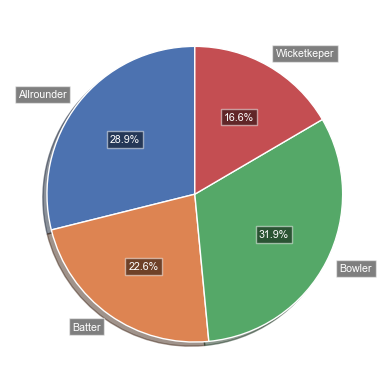

In [101]:
plt.pie(y['cnt'], labels=['Allrounder','Batter','Bowler','Wicketkeper'],  shadow=True, startangle=90, autopct='%1.1f%%', textprops=dict(color="white",bbox=dict(facecolor='black', alpha=0.5),fontsize='xx-small'))
